<font size = 5 color = "green"> **Analyzing the customer purchase behavior of an American multinational retail corporation**

# Business Case

**About Company**

The company is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.

**Business Problem**

The Management team wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

**Dataset**

The company collected the transactional data of customers who purchased products from the Walmart Stores during Black Friday. The dataset has the following features:

* User_ID:	User ID
* Product_ID:	Product ID
* Gender:	Sex of User
* Age:	Age in bins
* Occupation:	Occupation (Masked)
* City_Category:	Category of the City (A,B,C)
* StayInCurrentCityYears:	Number of years stay in current city
* Marital_Status:	Marital Status
* ProductCategory:	Product Category (Masked)
* Purchase:	Purchase Amount

# Basic Exploration

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway, kruskal
from scipy.stats import norm, shapiro, kstest
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [ ]:
!gdown 1Dg8UWZNnvuocbf61uZ05AByY6tWoPCsC

Downloading...
From: https://drive.google.com/uc?id=1Dg8UWZNnvuocbf61uZ05AByY6tWoPCsC
To: /content/walmart.csv
100% 23.0M/23.0M [00:00<00:00, 186MB/s]


In [ ]:
walmart = pd.read_csv("/content/walmart.csv")

In [ ]:
df = walmart.copy()
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
# df.set_index("User_ID", inplace = True)

## Basic Exploration

In [ ]:
df.shape

(550068, 10)

In [ ]:
print(f"Number of rows: {df.shape[0]:,} \nNumber of columns: {df.shape[1]}")

Number of rows: 550,068 
Number of columns: 10


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


### <font color= "green">Observations
1. Dataset contains 550,068 observations of 9 features for different users.
2. Occupation, Marital_Status, and Product_category variables need to be converted to category datatype.
</font>

## Pre-processing

In [ ]:
## Converting the categorical attributes to 'category'
df[["Marital_Status", "Product_Category", "Occupation"]] = df[["Marital_Status", "Product_Category", "Occupation"]].astype("category")
df.dtypes

User_ID                          int64
Product_ID                      object
Gender                          object
Age                             object
Occupation                    category
City_Category                   object
Stay_In_Current_City_Years      object
Marital_Status                category
Product_Category              category
Purchase                         int64
dtype: object

## Feature Exploration

In [ ]:
df.describe()

,User_ID,Purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [ ]:
df.describe(include = ["object", "category"]).T

,count,unique,top,freq
Product_ID,550068,3631,P00265242,1880
Gender,550068,2,M,414259
Age,550068,7,26-35,219587
Occupation,550068,21,4,72308
City_Category,550068,3,B,231173
Stay_In_Current_City_Years,550068,5,1,193821
Marital_Status,550068,2,0,324731
Product_Category,550068,20,5,150933


## Missing Values and Outliers

In [ ]:
## Missing Values detection
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

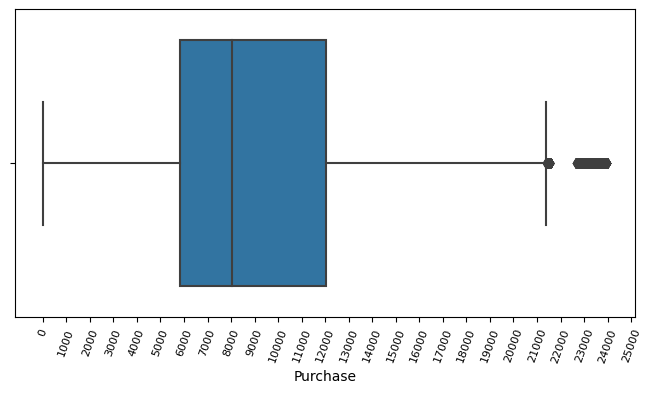

In [ ]:
# Outliers detection
plt.figure(figsize = (8,4))
sns.boxplot(x = df["Purchase"]);
# plt.grid()
plt.xticks(np.arange(0,26000,1000), rotation=70, fontsize=8);

In [ ]:
q1 = np.percentile(df["Purchase"],25)
q2 = np.percentile(df["Purchase"],50)
q3 = np.percentile(df["Purchase"],75)
q4 = np.percentile(df["Purchase"],100)
iqr = q3-q1
upper_threshold = min((q3+ 1.5*iqr), q4)
print("Q1 = ", q1, "; Q2 = ", q2,  "; Q3 = ", q3, "; Q4 = ", q4 , "; IQR = ", iqr, "; Upper Threshold = ",upper_threshold)

Q1 =  5823.0 ; Q2 =  8047.0 ; Q3 =  12054.0 ; Q4 =  23961.0 ; IQR =  6231.0 ; Upper Threshold =  21400.5


In [ ]:
# Count of Outliers
outliers = df.loc[df["Purchase"] > upper_threshold]["User_ID"].count()
print("Total No of Oultiers in the purchase column - ", outliers)
print("Percentage of Oultiers in the purchase column - ", np.round(outliers*100/df.shape[0], 2), "%")

Total No of Oultiers in the purchase column -  2677
Percentage of Oultiers in the purchase column -  0.49 %


In [ ]:
# Dropping row of Outliers
df1 = df.copy()
df1.drop(index = df1[df1["Purchase"]> upper_threshold].index, inplace = True)

### <font color= "green">Observations
1. There are no missing values in the dataset
2. There are 2,677 outliers present in the Purchase column which are less than 1% of the sample. This can be dropped or imputed.
  
  
<font color = "blue" size = 2> Note: (For this case study I am not using the treated dataset as it will not have much impact)

# Exploratory Data Analysis

## Non-graphical analysis

### Unique values

In [ ]:
## Unique values in each feature categories
unq_cnt = pd.DataFrame(columns= ["Variables", "No of Unique Values"])
print("Unique categories in each feature")
for i in df.columns:
    unq_cnt.loc[len(unq_cnt.index)] = [i,df[i].nunique()]
unq_cnt

Unique categories in each feature


,Variables,No of Unique Values
0,User_ID,5891
1,Product_ID,3631
2,Gender,2
3,Age,7
4,Occupation,21
5,City_Category,3
6,Stay_In_Current_City_Years,5
7,Marital_Status,2
8,Product_Category,20
9,Purchase,18105


In [ ]:
# List of Columns
df_col = df.columns
df_col

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object')

In [ ]:
## Extracting a list of Categorical Columns
cat_col = df_col[2:-1]
cat_col

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype='object')

In [ ]:
# value_count = (df[cat_col].melt().groupby(['variable', 'value'])[['value']].count()/len(df)).round(2).style.background_gradient()
# value_count

### Value Count

In [ ]:
# Value Counts
print("Category wise count and proportion of the categorical variables", end = "\n\n")
for col in cat_col:
  print(col)
  cat_count = pd.DataFrame({
      "Value_Count": df[col].value_counts(),
      "Proportion": df[col].value_counts(normalize = True, sort = True).round(2)
      })
  print(cat_count)
  print("_ "*20)
  print()

Category wise count and proportion of the categorical variables

Gender
   Value_Count  Proportion
M       414259        0.75
F       135809        0.25
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Age
       Value_Count  Proportion
26-35       219587        0.40
36-45       110013        0.20
18-25        99660        0.18
46-50        45701        0.08
51-55        38501        0.07
55+          21504        0.04
0-17         15102        0.03
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

Occupation
    Value_Count  Proportion
4         72308        0.13
0         69638        0.13
7         59133        0.11
1         47426        0.09
17        40043        0.07
20        33562        0.06
12        31179        0.06
14        27309        0.05
2         26588        0.05
16        25371        0.05
6         20355        0.04
3         17650        0.03
10        12930        0.02
5         12177        0.02
15        12165        0.02
11        11586        0.02
19         8461        0

#### <font color= "green">Observations
1. There are 5,891 different users and 3,631 unique products in the dataset
2. 75% of the buyers are Males
3. 40% of the buyers are from 26-35 years of Age-group
4. Most number of buyers are from city B
5. 35% of the buyers stayed in the city for less than one years
6. 59% of the buyers are unmarried
7. Product 5, 1, and 8 contributes to 74% of the purchases

## Graphical Analysis

### Univariate Analysis

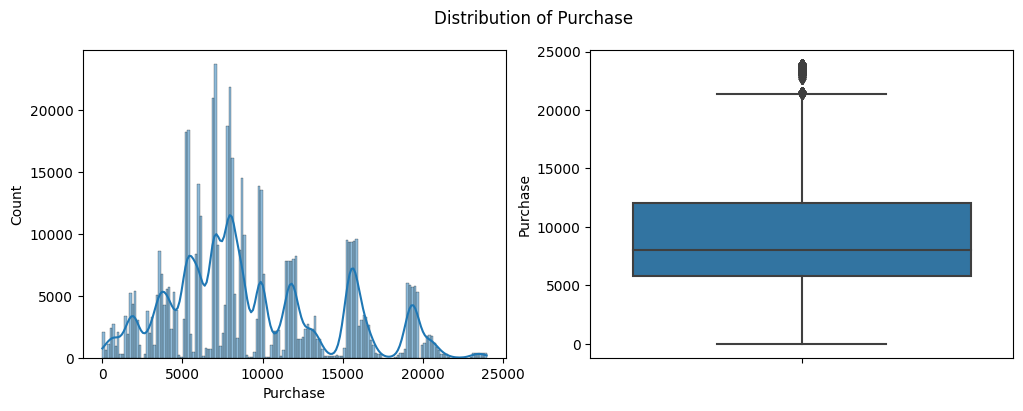

In [ ]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(df["Purchase"], kde = True);

plt.subplot(1,2,2)
sns.boxplot(data= df, y= "Purchase");

plt.suptitle("Distribution of Purchase");

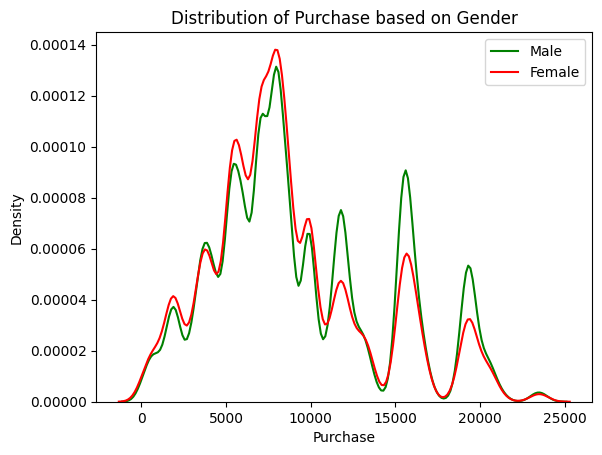

In [ ]:
males_purchase = df.loc[df["Gender"] == "M"]["Purchase"]
females_purchase = df.loc[df["Gender"] == "F"]["Purchase"]
sns.kdeplot(males_purchase, color = "g");
sns.kdeplot(females_purchase, color = "r");
plt.title("Distribution of Purchase based on Gender");
plt.legend(["Male", "Female"]);

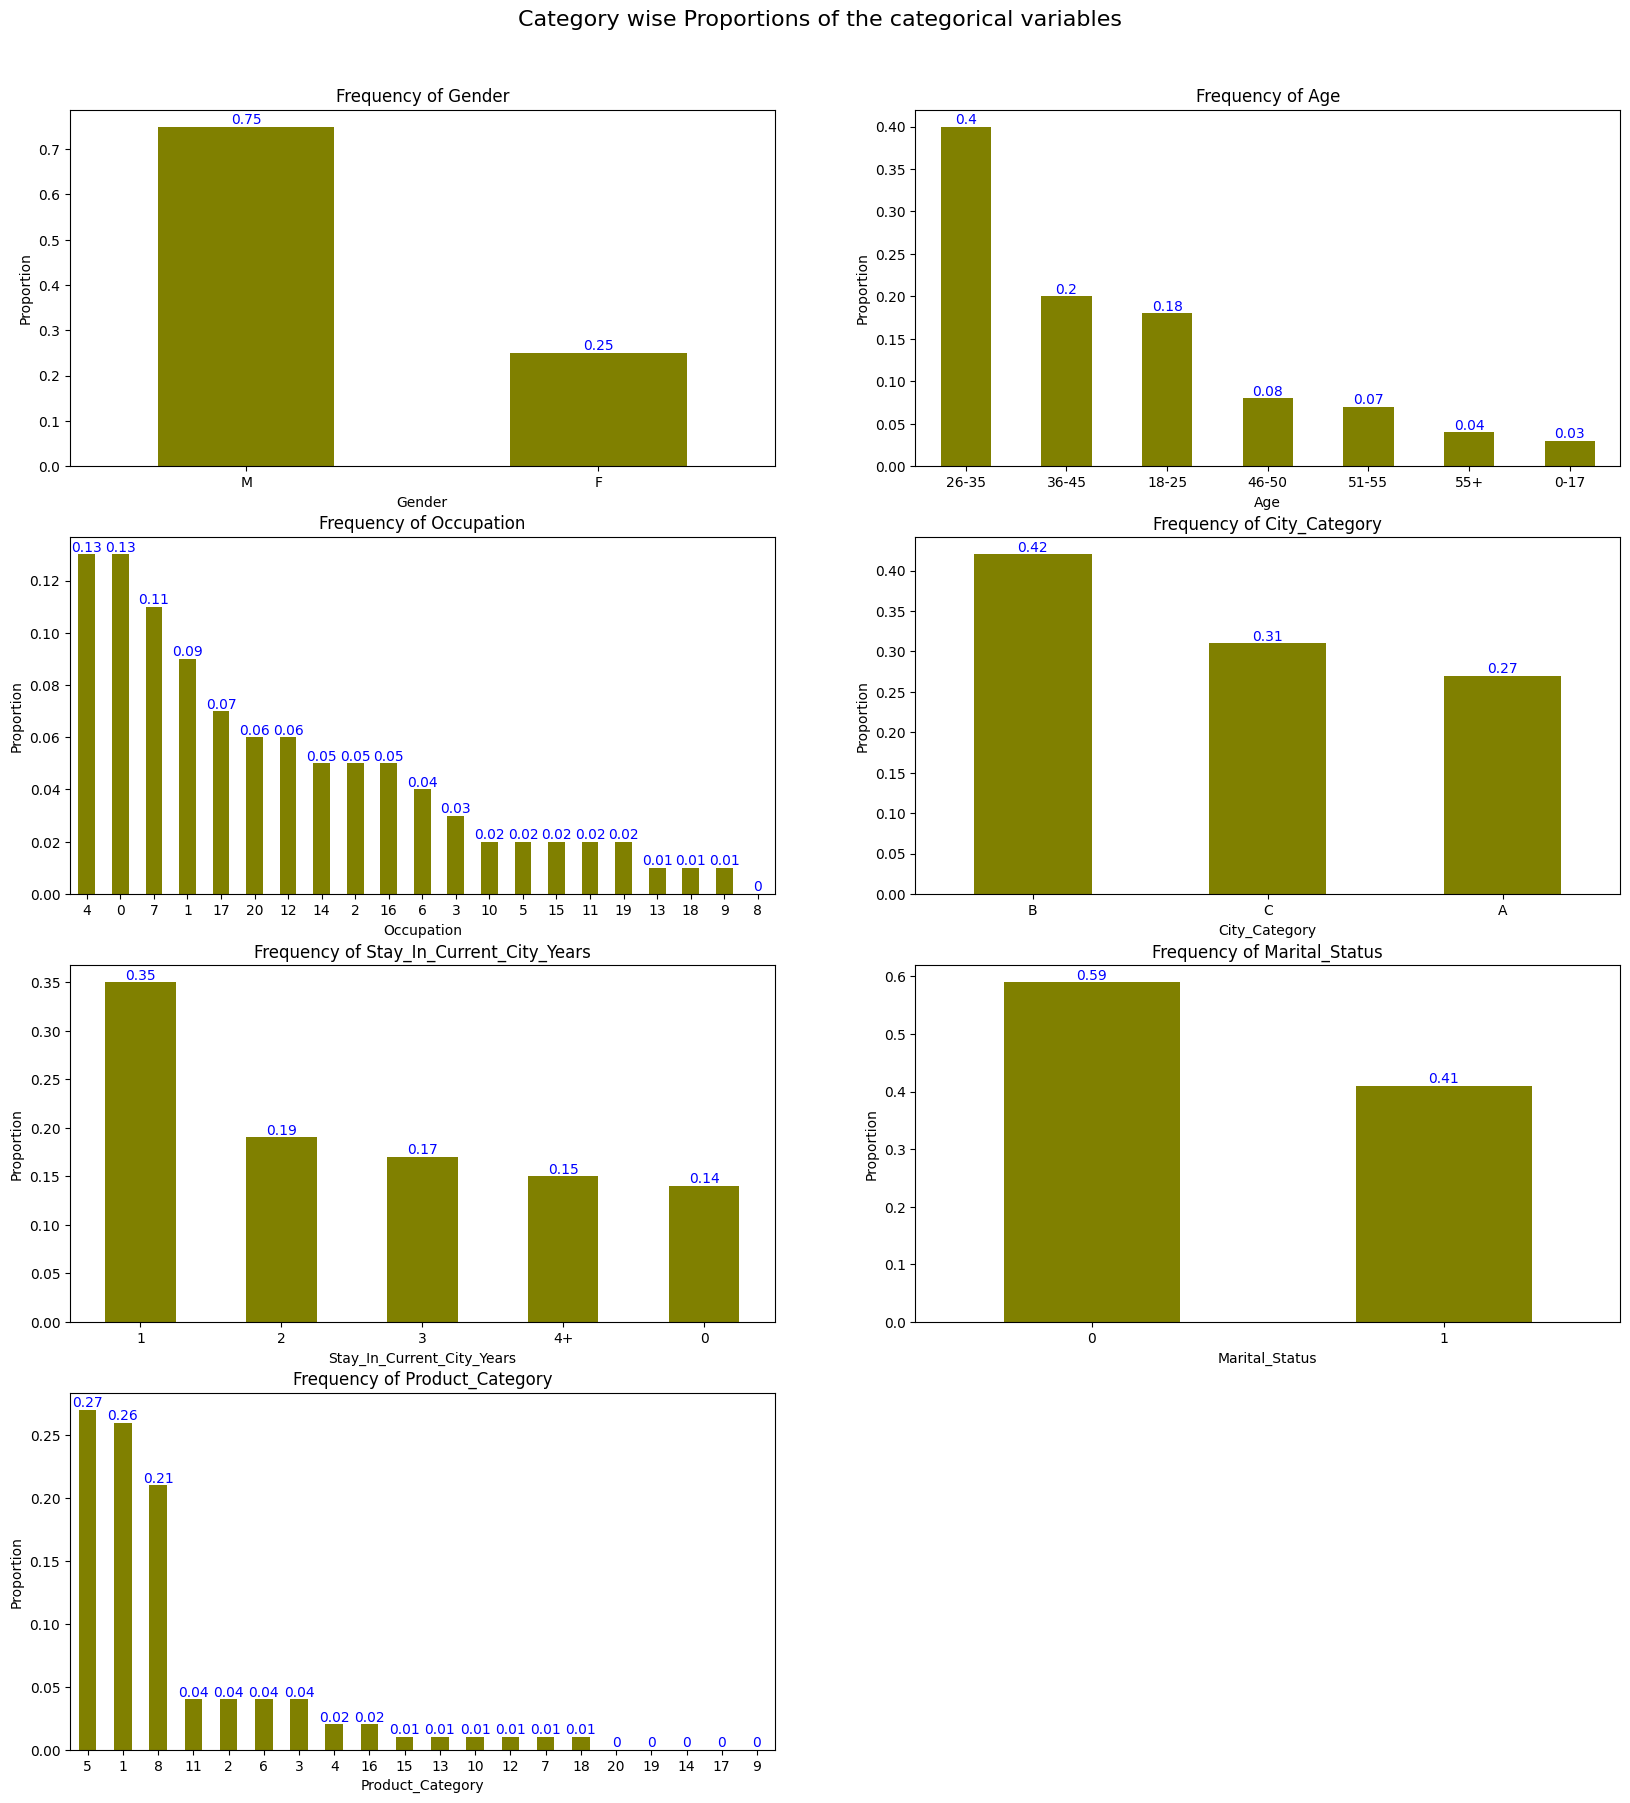

In [ ]:
fig = plt.figure(figsize = (20,20))
fig.subplots_adjust(top = .93)
ind = 1
for col in cat_col:
  plt.subplot(4,2,ind)
  ax=df[col].value_counts(normalize = True).round(2).plot.bar(color = "olive");
  plt.ylabel("Proportion")
  plt.title("Frequency of "+ col, fontsize  = 12)
  plt.xlabel(col,fontsize = 10)
  plt.xticks(rotation=0,fontsize = 10);
  ax.bar_label(ax.containers[0], color = "blue")
  ind += 1

plt.suptitle("Category wise Proportions of the categorical variables", fontsize= 16);

#### <font color= "green">Observations
1. Males and Females Purchase distributions are non-gausian and following fairly the same path
2. 40%: 26-35, 18%: 18-25, 20%: 36-45
3. 75% of the users are Male and 25% are Female
4. 59% Single, 41% Married
5. 35% Staying in the city from 1 year, 18% from 2 years, 17% from 3 years
Total of 20 product categories are there
6. More users belong to B City_Category
7. Product_Category - 1, 5, and 8 have highest purchasing frequency.

### Bivariate Analysis

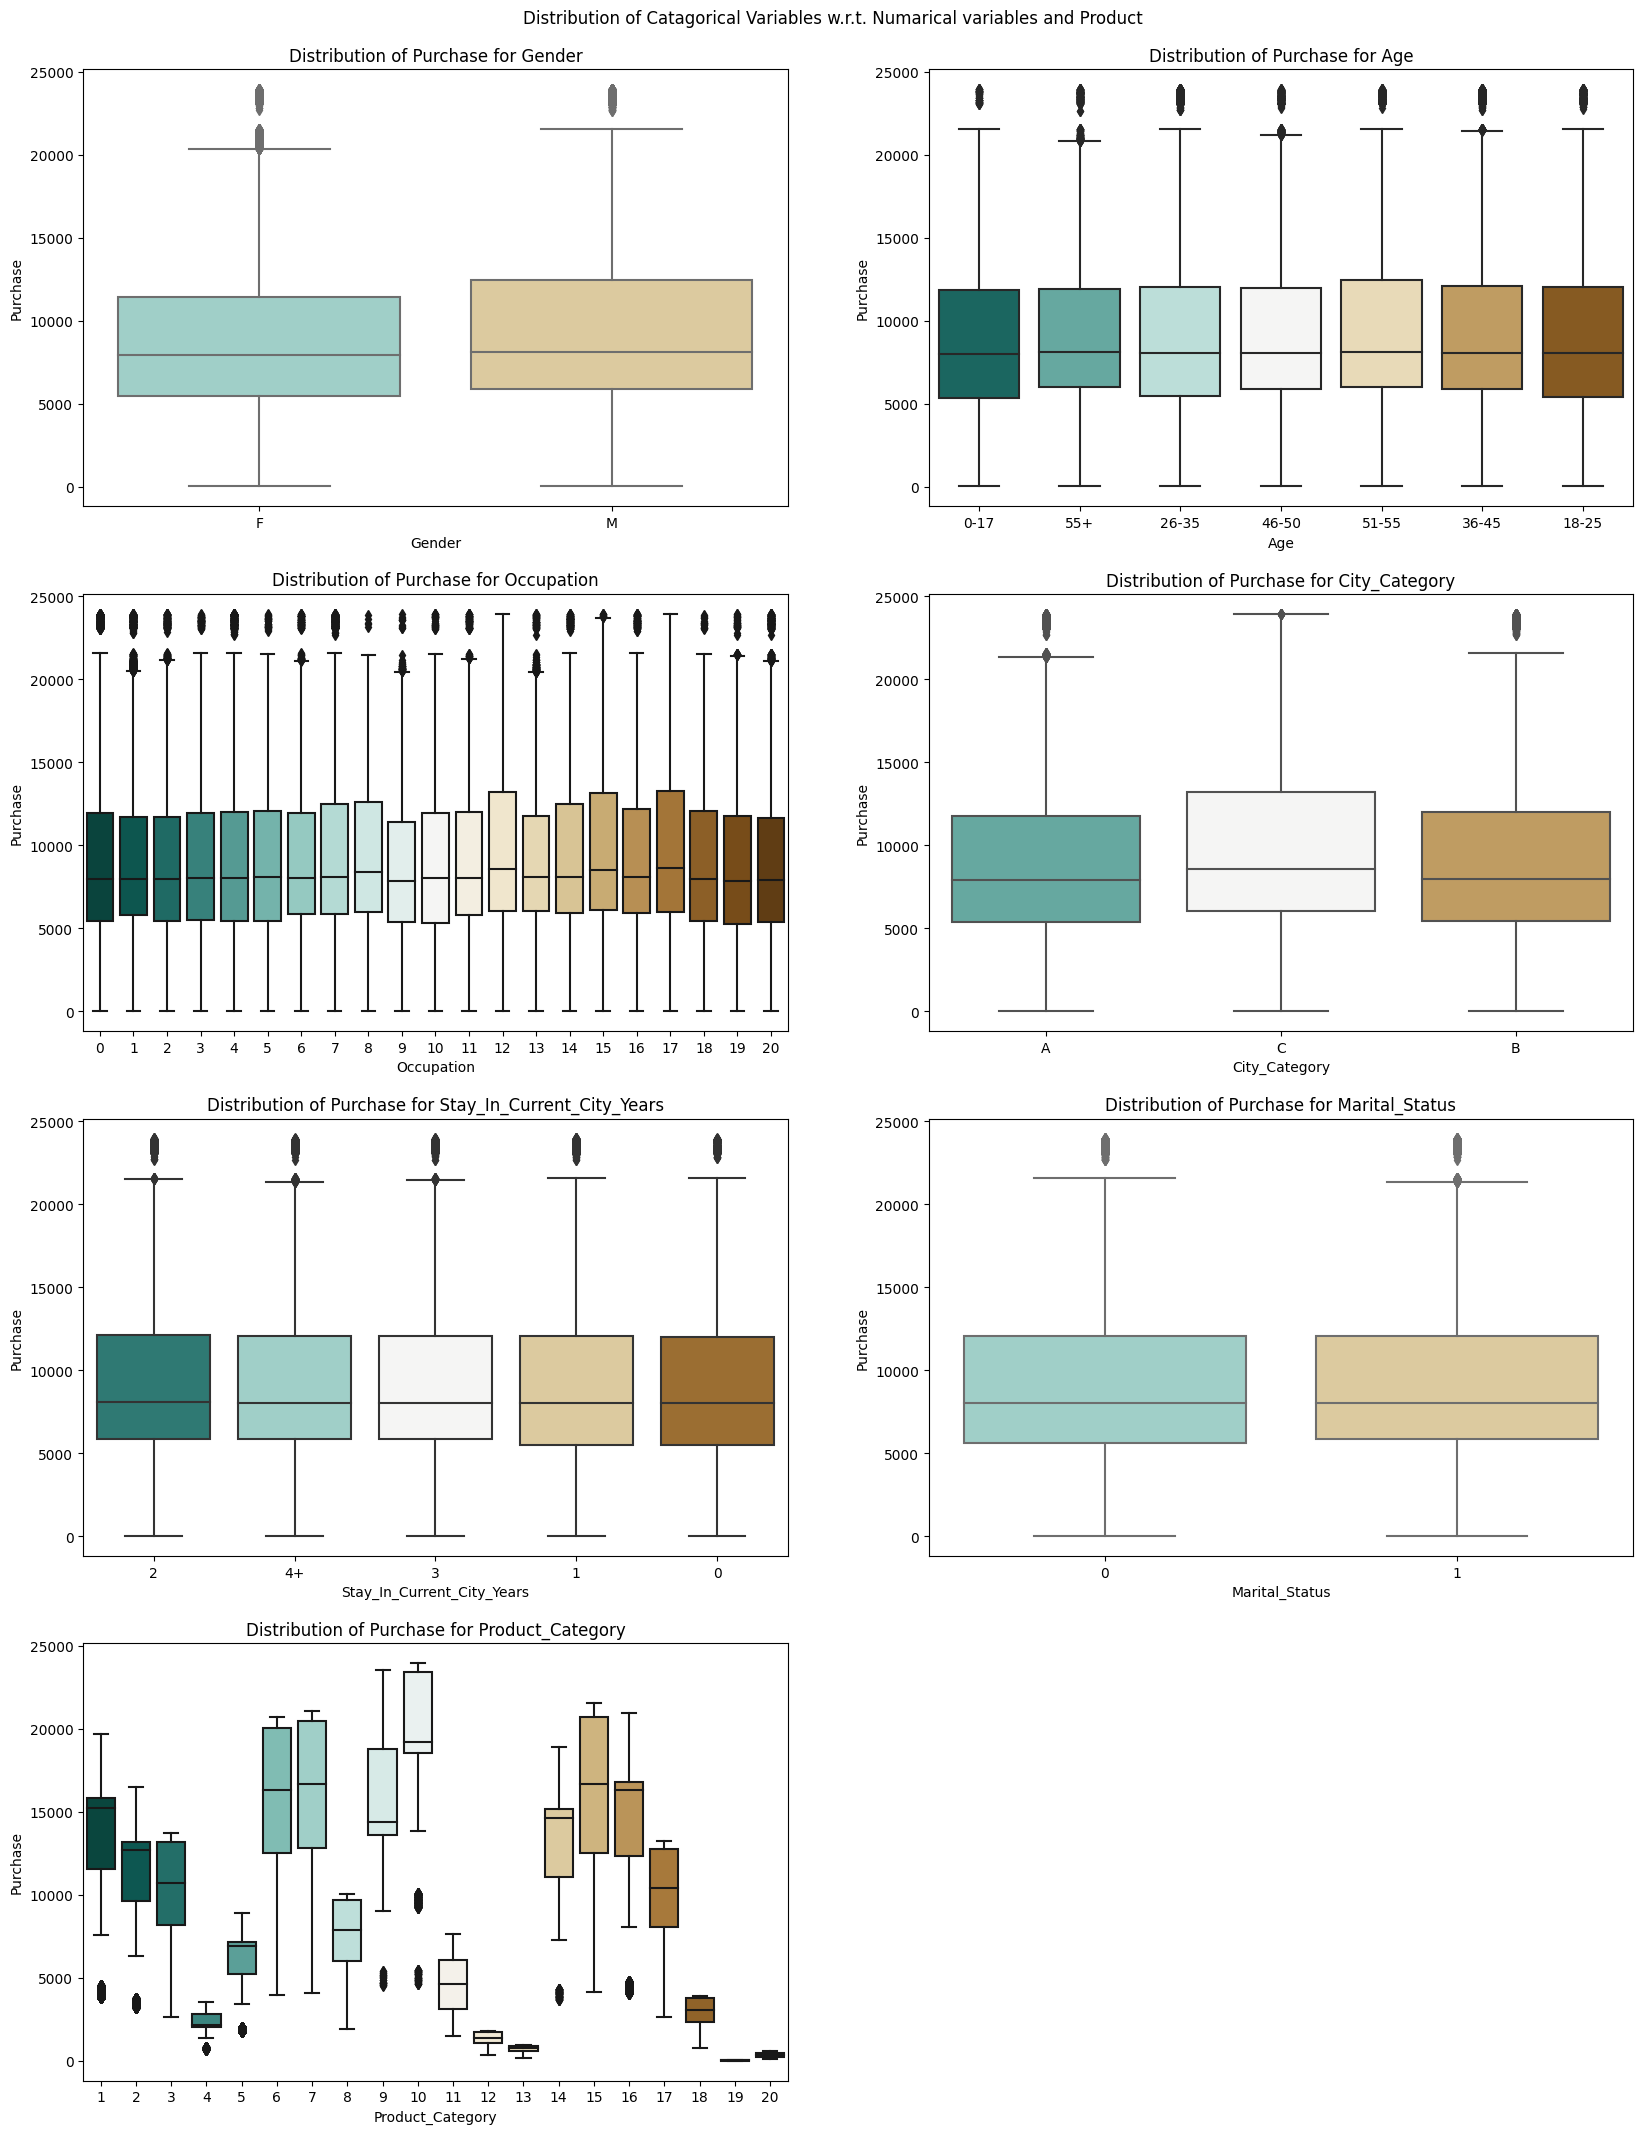

In [ ]:
## plots between numerical and categorical variables
fig = plt.figure(figsize = (20,60))
i = 1
plt.suptitle("Distribution of Catagorical Variables w.r.t. Numarical variables and Product");
fig.tight_layout()
fig.subplots_adjust(top=0.97)
for c in cat_col:
    x = c
    y = df["Purchase"]
    plt.subplot(10,2,i);
    ax = sns.boxplot(data = df, x = x, y = y, palette='BrBG_r');
    plt.title("Distribution of Purchase for "+ c)
    i += 1

#### <font color= "green">Observations
1. Males have slightly higher purchases than females
2. Except age group 51-55, others age groups have almost same purchases
3. City C has higher purchases than other two cities
4. Marrital status and years of stay in the city have similar distribution

### Multivariate Analysis

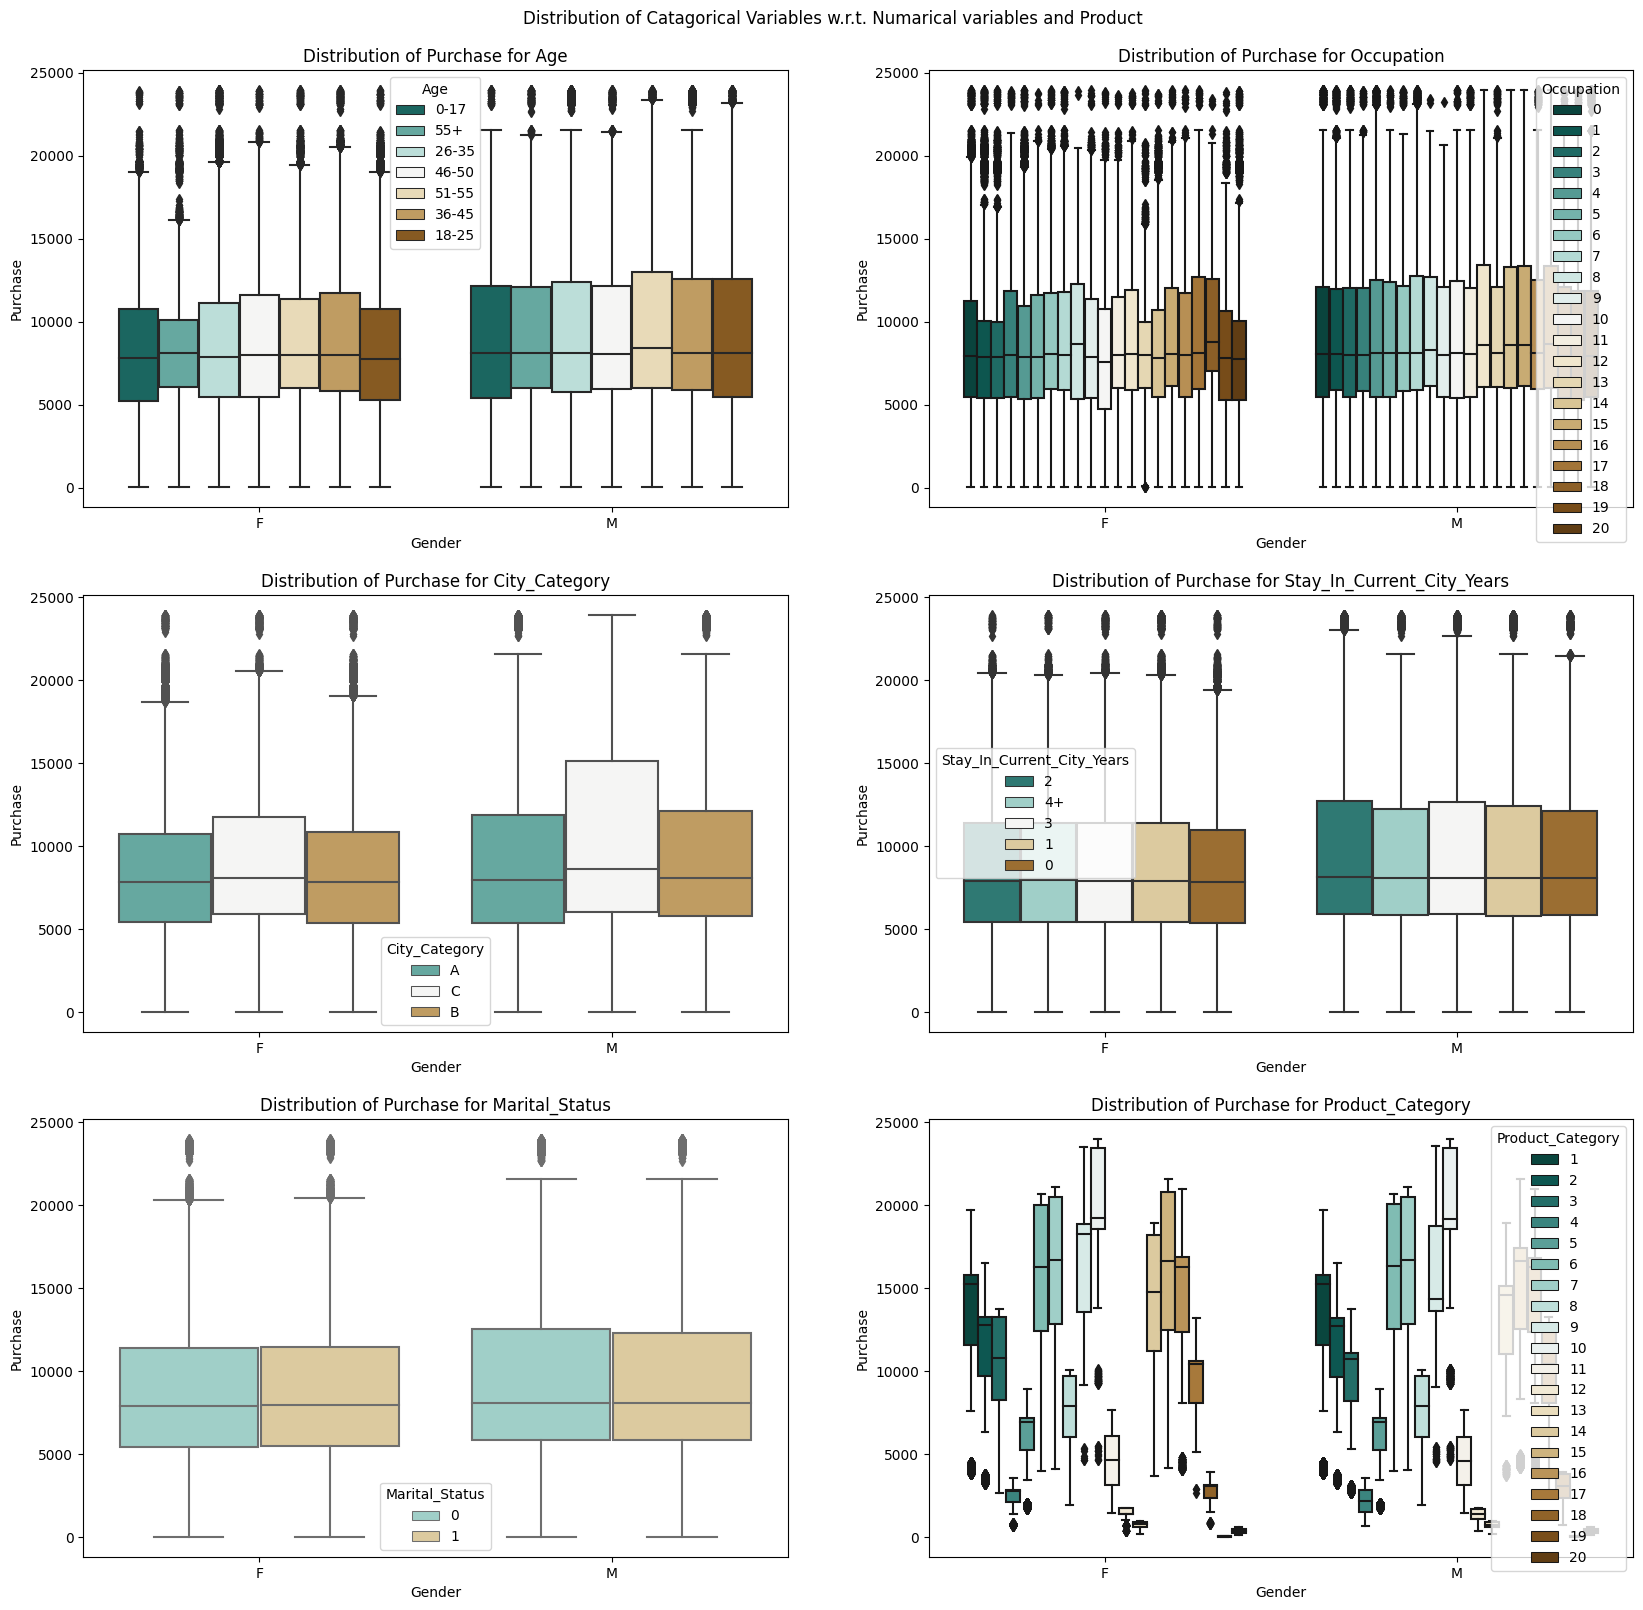

In [ ]:
## plots between numerical and categorical variables
fig = plt.figure(figsize = (20,60))
i = 1
plt.suptitle("Distribution of Catagorical Variables w.r.t. Numarical variables and Product");
fig.tight_layout()
fig.subplots_adjust(top=0.97)
for c in cat_col[1:]:
    x = "Gender"
    y = df["Purchase"]
    plt.subplot(10,2,i);
    ax = sns.boxplot(data = df, x = x, y = y, hue = c, palette='BrBG_r');
    plt.title("Distribution of Purchase for "+ c)
    i += 1

#### <font color= "green">Observations
1. For males, age group 51-55 has higher purchases than other groups.
2. Similarly for females, age group 55+ has higher purchases than other groups
3. City 3 has more purchases for both the genders
4. For both the genders, purchase median is almost the same for unmarried and married person

# Purchase behaviour for Categories - Gender, Marital Status, Age

## Purchase behaviour of Males and Females

### Using Bootstrapping

In [ ]:
male_purchase = df.loc[df["Gender"] == "M"]["Purchase"]
male_purchase.mean()

9437.526040472265

In [ ]:
female_purchase = df.loc[df["Gender"] == "F"]["Purchase"]
female_purchase.mean()

8734.565765155476

**Applying the concept of CLT & Bootstrapping to understand the behaviour of the Population**

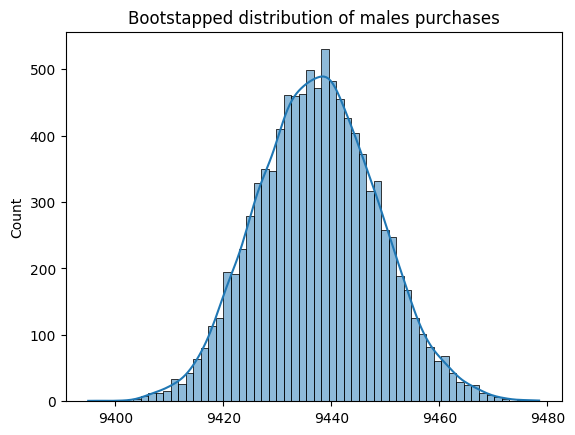

In [ ]:
bs_samp_male_mean = []
for i in range(10000):
    bs_samp_male = np.random.choice(np.array(male_purchase), size = len(male_purchase)//2 )
    bs_samp_male_mean.append(np.mean(bs_samp_male))

## Plotting the distribution
sns.histplot(bs_samp_male_mean, kde=True)
plt.title("Bootstapped distribution of males purchases")
plt.show()

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_samp_male_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.054932039231061935


In [ ]:
zscores = (bs_samp_male_mean - np.mean(bs_samp_male_mean))/np.std(bs_samp_male_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.7093111738807876


**Getting the confidence interval for male purchases**

In [ ]:
l = np.percentile(bs_samp_male_mean, .5)
u = np.percentile(bs_samp_male_mean, 99.5)
print("Mean Purchases amount for male with 99% Confidence Interval:", np.round(l,1),"-" ,np.round(u,1))

Mean Purchases amount for male with 99% Confidence Interval: 9409.5 - 9466.6


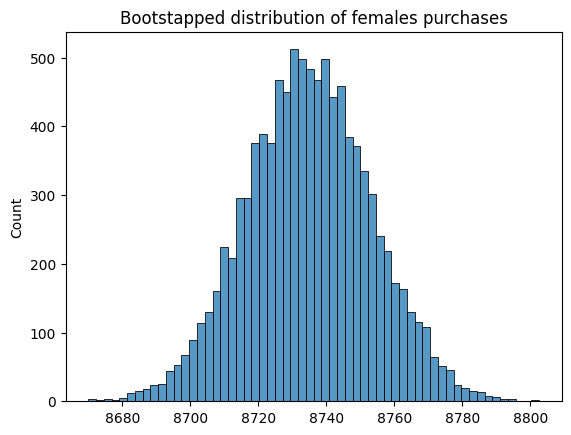

In [ ]:
bs_samp_female_mean = []
for i in range(10000):
    bs_samp_female = np.random.choice(np.array(female_purchase), size = len(female_purchase)//2 )
    bs_samp_female_mean.append(np.mean(bs_samp_female))

## Plotting the distribution
sns.histplot(bs_samp_female_mean);
plt.title("Bootstapped distribution of females purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_samp_female_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9144262075424194


In [ ]:
zscores = (bs_samp_female_mean - np.mean(bs_samp_female_mean))/np.std(bs_samp_female_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.996995129168834


**Getting the confidence interval for female purchases**

In [ ]:
l = np.percentile(bs_samp_female_mean, .5)
u= np.percentile(bs_samp_female_mean, 99.5)
print("Mean Purchases amount for female with 99% Confidence Interval:", np.round(l,1), np.round(u,1))

Mean Purchases amount for female with 99% Confidence Interval: 8687.1 8782.1


**_As the Confidence Intervals are not overlapping for 99% level, we do not need to check for 95% and 90% levels. The CI will also be apart for those levels_**

#### <font color= "green">Observations
1. The confidence interval of male purchases **```|9409.5 - 9466.6|```** and female purchases **`|8687.1 8782.1|`** are significantly apart and are not overlapping
2. With 99% confidence we can say, the mean purchase amount for male is higher than females.

### Hypothesis Testing: Validation of above claim using t-test

In [ ]:
# Ho : male's purchase mean amount and female's purchase mean amount are equal
# Ha : male's purchase amount is greater than female's purchase amount

t_stat, p_value = ttest_ind(male_purchase, female_purchase, alternative="greater")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

alpha = 0.01
if p_value < alpha:
  print("Interpretation: Reject H0: Variable means are not same")
else:
  print("Interpretation: Fail to reject H0 - Variable Means are same")

t-statistic:  44.837957934353966
p-value:  0.0
Interpretation: Reject H0: Variable means are not same


#### <font color= "green">Observations
1. With 99% confidence, we can say, the mean purchase amount for male is higher than females

### Aggregating on User-id to get the overall purchase behaviour of user

**Mean Purchased for users**

In [ ]:
avg_purchase_per_userid = df.groupby(['User_ID','Gender'])['Purchase'].mean().reset_index()
avg_purchase_per_userid

,User_ID,Gender,Purchase
0,1000001,F,9545.514286
1,1000002,M,10525.610390
2,1000003,M,11780.517241
3,1000004,M,14747.714286
4,1000005,M,7745.292453
...,...,...,...
5886,1006036,F,8007.894942
5887,1006037,F,9176.540984
5888,1006038,F,7502.833333
5889,1006039,F,7977.283784


**Gender-wise classification**

In [ ]:
avg_purchase_per_userid.groupby(["Gender"])["Purchase"].mean().round(2).reset_index()

,Gender,Purchase
0,F,8965.20
1,M,9806.87


In [ ]:
male_avg_purchase = avg_purchase_per_userid.loc[avg_purchase_per_userid["Gender"]=="M"]["Purchase"]
male_avg_purchase.mean()

9806.867524226629

In [ ]:
female_avg_purchase = avg_purchase_per_userid.loc[avg_purchase_per_userid["Gender"]=="F"]["Purchase"]
female_avg_purchase.mean()

8965.19846393646

**Testing the hypothesis: if male purchases are significantly higher than females**

In [ ]:
t_stat, p_value = ttest_ind(male_avg_purchase, female_avg_purchase, alternative="greater")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

alpha = 0.01
if p_value < alpha:
  print("Interpretation: Reject H0: Variable means are not same")
else:
  print("Interpretation: Fail to reject H0 - Variable Means are same")

t-statistic:  15.710670799370236
p-value:  8.076937189935654e-55
Interpretation: Reject H0: Variable means are not same


#### <font color= "green">Observations
1. With 99% confidence, we can conclude that the males purchases are higher than females

## Purchase behaviour of Married and Unmarried People

### Using Bootstrapping

In [ ]:
married_purchases = df.loc[df["Marital_Status"] == 1]["Purchase"]
married_purchases.mean()

9261.174574082374

In [ ]:
unmarried_purchases = df.loc[df["Marital_Status"] == 0]["Purchase"]
unmarried_purchases.mean()

9265.907618921507

**Applying the concept of CLT & Bootstrapping to understand the behaviour of the Population**

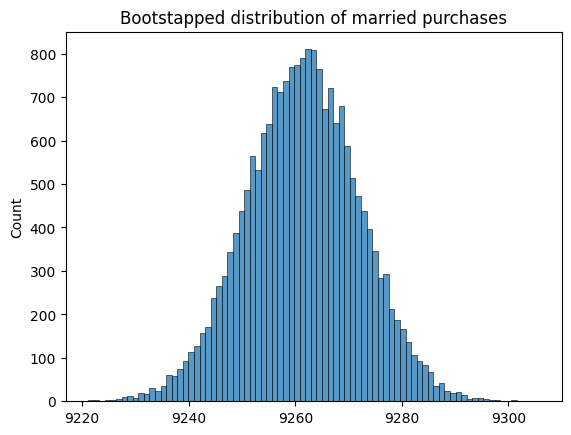

In [ ]:
bs_samp_married_mean = []
for i in range(20000):
    bs_samp_married = np.random.choice(np.array(married_purchases), size = len(married_purchases) )
    bs_samp_married_mean.append(np.mean(bs_samp_married))

## Plotting the distribution
sns.histplot(bs_samp_married_mean);
plt.title("Bootstapped distribution of married purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_samp_married_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.5749285221099854


In [ ]:
zscores = (bs_samp_married_mean - np.mean(bs_samp_married_mean))/np.std(bs_samp_married_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.5996559425631942


In [ ]:
l = np.percentile(bs_samp_married_mean, 5)
u = np.percentile(bs_samp_married_mean, 95)
print("Mean Purchases for Married People with 90% Confidence Interval: ", np.round(l,1), np.round(u,1))

Mean Purchases for Married People with 90% Confidence Interval:  9244.0 9278.8


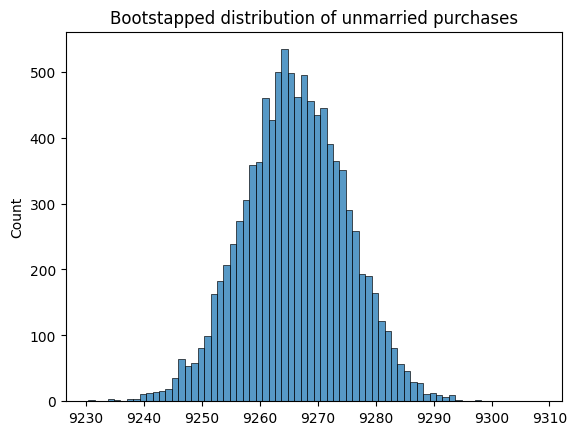

In [ ]:
bs_samp_unmarried_mean = []
for i in range(10000):
  bs_samp_unmarried = np.random.choice(np.array(unmarried_purchases), size = len(unmarried_purchases) )
  bs_samp_unmarried_mean.append(np.mean(bs_samp_unmarried))

## Plotting the distribution
sns.histplot(bs_samp_unmarried_mean);
plt.title("Bootstapped distribution of unmarried purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_samp_unmarried_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.18276123702526093


In [ ]:
zscores = (bs_samp_unmarried_mean - np.mean(bs_samp_unmarried_mean))/np.std(bs_samp_unmarried_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9477277072488566


In [ ]:
l = np.percentile(bs_samp_unmarried_mean, 5)
u = np.percentile(bs_samp_unmarried_mean, 95)
print("Mean Purchases for unmarried People with 90% Confidence Interval: ", np.round(l,1), np.round(u,1))

Mean Purchases for unmarried People with 90% Confidence Interval:  9251.7 9280.6


<font color = "darkcyan">

**_As the Confidence Intervals are overlapping for 90% level, it is obvious it will be overlapping for 95% and 99% levels as well._** <br>

Note: I'm not showing the higher iterations due to time complexity but Even after running the simulation for 100,000 iterations, the results were same.**

#### <font color = "green"> Observations
1. The confidence interval of married people purchases **```|9244.0-9278.8|```** and unmarried people purchases **```|9251.7 - 9280.6|```** are overlapping, even for 90% CI.
2. There is no difference in the Buying pattern of Married and Unmarried People

### Hypothesis Testing: Validation using t-test

In [ ]:
# Ho : purchase mean amount for married and purchase mean amount for unmarried are equal
# Ha : purchase amount for married is less than purchase amount for unmarried

t_stat, p_value = ttest_ind(married_purchases, unmarried_purchases, alternative = "less")
print("t-statistic: ", t_stat)
print("p-value: ", p_value)

alpha = 0.01
if p_value < alpha:
  print("Interpretation: Reject H0")
else:
  print("Interpretation: Fail to reject H0")

t-statistic:  -0.3436698055440526
p-value:  0.3655473762879158
Interpretation: Fail to reject H0


#### <font color="green"> Observations
1. There is no difference in the Buying pattern of Married and Unmarried People

## Purchase behaviour of different Age categories

In [ ]:
df["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df.groupby(["Age"])["Purchase"].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

In [ ]:
children = df.loc[df["Age"] == "0-17"]["Purchase"]
children.mean()

8933.464640444974

In [ ]:
youth = df.loc[df["Age"] == "18-25"]["Purchase"]
youth.mean()

9169.663606261289

In [ ]:
young_adults = df.loc[df["Age"] == "26-35"]["Purchase"]
young_adults.mean()

9252.690632869888

In [ ]:
adults = df.loc[df["Age"] == "36-45"]["Purchase"]
adults.mean()

9331.350694917874

In [ ]:
mid40s =  df.loc[df["Age"] == "46-50"]["Purchase"]
mid40s.mean()

9208.625697468327

In [ ]:
early50s =  df.loc[df["Age"] == "51-55"]["Purchase"]
early50s.mean()

9534.808030960236

In [ ]:
seniors = df.loc[df["Age"] == "55+"]["Purchase"]
seniors.mean()

9336.280459449405

### Using Bootstrapping

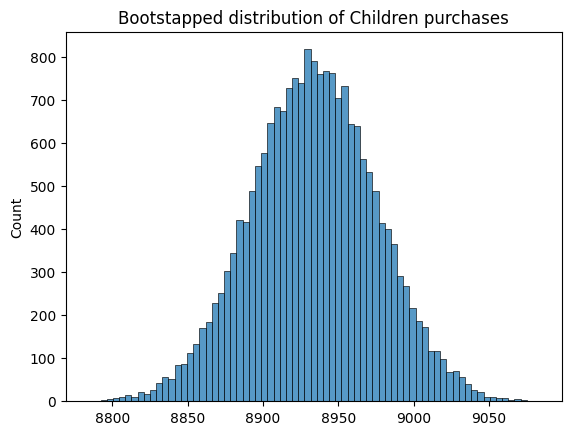

In [ ]:
bs_children_mean = []
for i in range(20000):
    bs_children = np.random.choice(np.array(children), size = len(children) )
    bs_children_mean.append(np.mean(bs_children))

## Plotting the distribution
sns.histplot(bs_children_mean);
plt.title("Bootstapped distribution of Children purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_children_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.5791277885437012


In [ ]:
zscores = (bs_children_mean - np.mean(bs_children_mean))/np.std(bs_children_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9986114169195397


In [ ]:
l1 = np.percentile(bs_children_mean, 5)
u1 = np.percentile(bs_children_mean, 95)
print("Mean Purchases amount for children with 90% Confidence Interval: ", np.round(l1,1), np.round(u1,1))

l1a = np.percentile(bs_children_mean, 2.5)
u1a = np.percentile(bs_children_mean, 97.5)
print("Mean Purchases amount for children with 95% Confidence Interval: ", np.round(l1a,1), np.round(u1a,1))

l1b = np.percentile(bs_children_mean, .5)
u1b = np.percentile(bs_children_mean, 99.5)
print("Mean Purchases amount for children with 99% Confidence Interval: ", np.round(l1b,1), np.round(u1b,1))

Mean Purchases amount for children with 90% Confidence Interval:  8865.4 9001.8
Mean Purchases amount for children with 95% Confidence Interval:  8852.0 9015.1
Mean Purchases amount for children with 99% Confidence Interval:  8826.3 9038.3


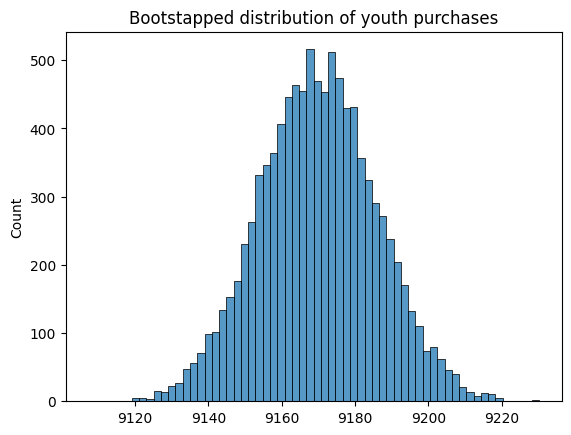

In [ ]:
bs_youth_mean = []
for i in range(10000):
    bs_youth = np.random.choice(np.array(youth), size = len(youth) )
    bs_youth_mean.append(np.mean(bs_youth))

## Plotting the distribution
sns.histplot(bs_youth_mean);
plt.title("Bootstapped distribution of youth purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_youth_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.7673386931419373


In [ ]:
zscores = (bs_youth_mean - np.mean(bs_youth_mean))/np.std(bs_youth_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9282022104948086


In [ ]:
l2 = np.percentile(bs_youth_mean, 5)
u2 = np.percentile(bs_youth_mean, 95)
print("Mean Purchases amount for youth with 90% Confidence Interval: ", np.round(l2,1), np.round(u2,1))

l2a = np.percentile(bs_youth_mean, 2.5)
u2a = np.percentile(bs_youth_mean, 97.5)
print("Mean Purchases amount for youth with 95% Confidence Interval: ", np.round(l2a,1), np.round(u2a,1))

l2b = np.percentile(bs_youth_mean, .5)
u2b = np.percentile(bs_youth_mean, 99.5)
print("Mean Purchases amount for youth with 99% Confidence Interval: ", np.round(l2b,1), np.round(u2b,1))

Mean Purchases amount for youth with 90% Confidence Interval:  9143.4 9196.2
Mean Purchases amount for youth with 95% Confidence Interval:  9138.6 9201.7
Mean Purchases amount for youth with 99% Confidence Interval:  9129.5 9210.6


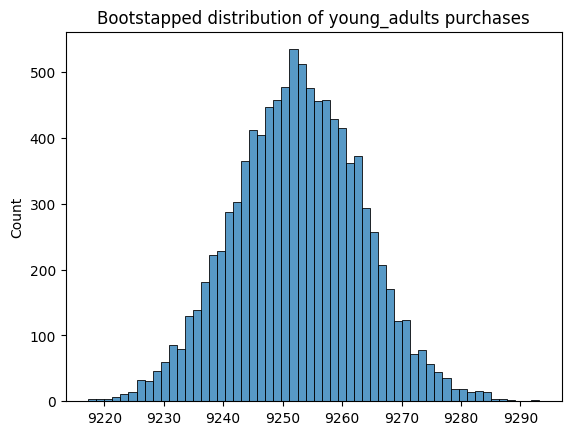

In [ ]:
bs_young_adults_mean = []
for i in range(10000):
    bs_young_adults = np.random.choice(np.array(young_adults), size = len(young_adults) )
    bs_young_adults_mean.append(np.mean(bs_young_adults))


## Plotting the distribution
sns.histplot(bs_young_adults_mean);
plt.title("Bootstapped distribution of young_adults purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_young_adults_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.06556400656700134


In [ ]:
zscores = (bs_young_adults_mean - np.mean(bs_young_adults_mean))/np.std(bs_young_adults_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.8979160796849112


In [ ]:
l3 = np.percentile(bs_young_adults_mean, 5)
u3 = np.percentile(bs_young_adults_mean, 95)
print("Mean Purchases amount for young_adults with 90% Confidence Interval: ", np.round(l3,1), np.round(u3,1))
l3a = np.percentile(bs_young_adults_mean, 5)
u3a = np.percentile(bs_young_adults_mean, 95)
print("Mean Purchases amount for young_adults with 95% Confidence Interval: ", np.round(l3a,1), np.round(u3a,1))
l3b = np.percentile(bs_young_adults_mean, 5)
u3b = np.percentile(bs_young_adults_mean, 95)
print("Mean Purchases amount for young_adults with 99% Confidence Interval: ", np.round(l3b,1), np.round(u3b,1))

Mean Purchases amount for young_adults with 90% Confidence Interval:  9234.9 9270.2
Mean Purchases amount for young_adults with 95% Confidence Interval:  9234.9 9270.2
Mean Purchases amount for young_adults with 99% Confidence Interval:  9234.9 9270.2


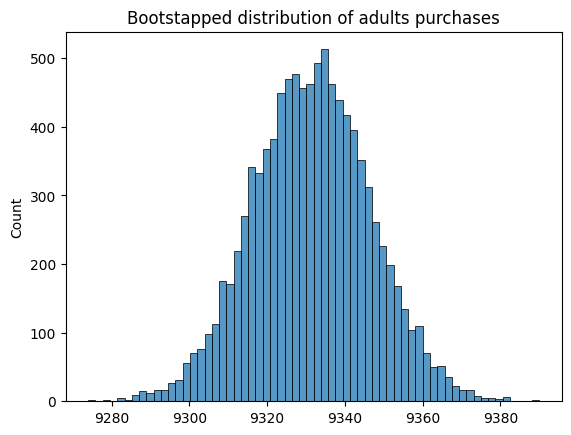

In [ ]:
bs_adults_mean = []
for i in range(10000):
    bs_adults = np.random.choice(np.array(adults), size = len(adults) )
    bs_adults_mean.append(np.mean(bs_adults))

## Plotting the distribution
sns.histplot(bs_adults_mean);
plt.title("Bootstapped distribution of adults purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_adults_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.6928369402885437


In [ ]:
zscores = (bs_adults_mean - np.mean(bs_adults_mean))/np.std(bs_adults_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9555980296741818


In [ ]:
l4 = np.percentile(bs_adults_mean, 5)
u4 = np.percentile(bs_adults_mean, 95)
print("Mean Purchases amount for adults with 90% Confidence Interval: ", np.round(l4,1), np.round(u4,1))

l4a = np.percentile(bs_adults_mean, 2.5)
u4a = np.percentile(bs_adults_mean, 97.5)
print("Mean Purchases amount for adults with 95% Confidence Interval: ", np.round(l4a,1), np.round(u4a,1))

l4b = np.percentile(bs_adults_mean, .5)
u4b = np.percentile(bs_adults_mean, 99.5)
print("Mean Purchases amount for adults with 99% Confidence Interval: ", np.round(l4b,1), np.round(u4b,1))

Mean Purchases amount for adults with 90% Confidence Interval:  9306.8 9356.4
Mean Purchases amount for adults with 95% Confidence Interval:  9301.7 9361.0
Mean Purchases amount for adults with 99% Confidence Interval:  9291.0 9370.5


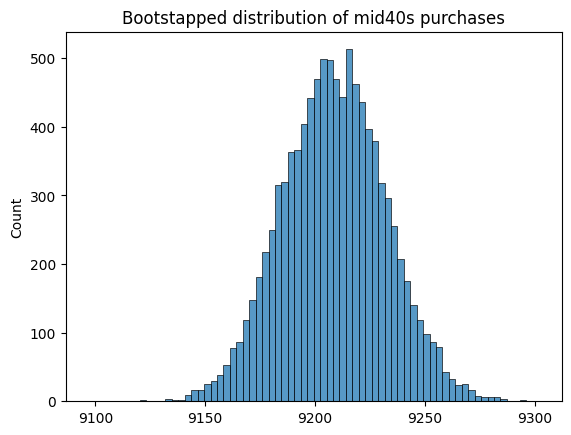

In [ ]:
bs_mid40s_mean = []
for i in range(10000):
    bs_mid40s = np.random.choice(np.array(mid40s), size = len(mid40s) )
    bs_mid40s_mean.append(np.mean(bs_mid40s))

## Plotting the distribution
sns.histplot(bs_mid40s_mean);
plt.title("Bootstapped distribution of mid40s purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_mid40s_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.23934942483901978


In [ ]:
zscores = (bs_mid40s_mean - np.mean(bs_mid40s_mean))/np.std(bs_mid40s_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.7241611466888724


In [ ]:
l5 = np.percentile(bs_mid40s_mean, 5)
u5 = np.percentile(bs_mid40s_mean, 95)
print("Mean Purchases amount for mid40s with 90% Confidence Interval: ", np.round(l5,1), np.round(u5,1))

l5a = np.percentile(bs_mid40s_mean, 2.5)
u5a = np.percentile(bs_mid40s_mean, 97.5)
print("Mean Purchases amount for mid40s with 95% Confidence Interval: ", np.round(l5a,1), np.round(u5a,1))

l5b = np.percentile(bs_mid40s_mean, .5)
u5b = np.percentile(bs_mid40s_mean, 99.5)
print("Mean Purchases amount for mid40s with 99% Confidence Interval: ", np.round(l5b,1), np.round(u5b,1))

Mean Purchases amount for mid40s with 90% Confidence Interval:  9170.6 9247.5
Mean Purchases amount for mid40s with 95% Confidence Interval:  9163.4 9255.2
Mean Purchases amount for mid40s with 99% Confidence Interval:  9149.3 9269.7


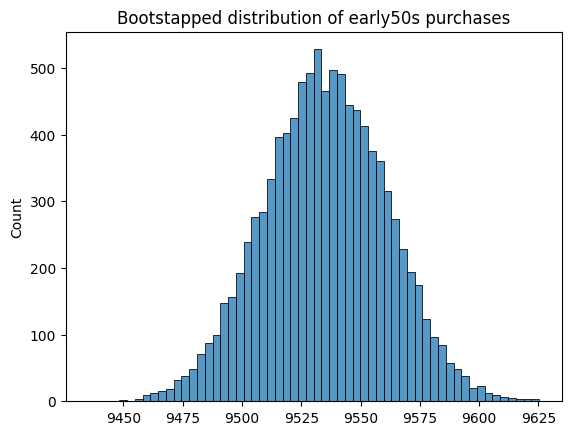

In [ ]:
bs_early50s_mean = []
for i in range(10000):
    bs_early50s = np.random.choice(np.array(early50s), size = len(early50s) )
    bs_early50s_mean.append(np.mean(bs_early50s))

## Plotting the distribution
sns.histplot(bs_early50s_mean);
plt.title("Bootstapped distribution of early50s purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_early50s_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.6447929739952087


In [ ]:
zscores = (bs_early50s_mean - np.mean(bs_early50s_mean))/np.std(bs_early50s_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.854409936675766


In [ ]:
l6 = np.percentile(bs_early50s_mean, 5)
u6 = np.percentile(bs_early50s_mean, 95)
print("Mean Purchases amount for early50s with 90% Confidence Interval: ", np.round(l6,1), np.round(u6,1))

l6a = np.percentile(bs_early50s_mean, 2.5)
u6a = np.percentile(bs_early50s_mean, 97.5)
print("Mean Purchases amount for early50s with 95% Confidence Interval: ", np.round(l6a,1), np.round(u6a,1))

l6b = np.percentile(bs_early50s_mean, .5)
u6b = np.percentile(bs_early50s_mean, 99.5)
print("Mean Purchases amount for early50s with 99% Confidence Interval: ", np.round(l6b,1), np.round(u6b,1))

Mean Purchases amount for early50s with 90% Confidence Interval:  9492.2 9577.0
Mean Purchases amount for early50s with 95% Confidence Interval:  9484.2 9584.9
Mean Purchases amount for early50s with 99% Confidence Interval:  9468.9 9601.5


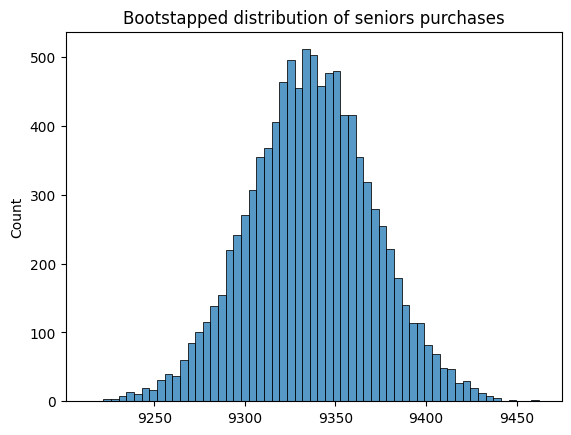

In [ ]:
bs_seniors_mean = []
for i in range(10000):
    bs_seniors = np.random.choice(np.array(seniors), size = len(seniors) )
    bs_seniors_mean.append(np.mean(bs_seniors))

## Plotting the distribution
sns.histplot(bs_seniors_mean);
plt.title("Bootstapped distribution of seniors purchases");
plt.show();

**Test for Normality**

In [ ]:
stat, pvalue = shapiro(bs_seniors_mean)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.3874204158782959


In [ ]:
zscores = (bs_seniors_mean - np.mean(bs_seniors_mean))/np.std(bs_seniors_mean)
stat, pvalue = kstest(zscores, norm.cdf)
print("Distribution is normal: pvalue is-", pvalue) if pvalue > 0.05 else print("Distribution is not normal: pvalue is-", pvalue)

Distribution is normal: pvalue is- 0.9051689416753734


In [ ]:
l7 = np.percentile(bs_seniors_mean, 5)
u7 = np.percentile(bs_seniors_mean, 95)
print("Mean Purchases amount for seniors with 90% Confidence Interval: ", np.round(l7,1), np.round(u7,1))

l7a = np.percentile(bs_seniors_mean, 2.5)
u7a = np.percentile(bs_seniors_mean, 97.5)
print("Mean Purchases amount for seniors with 95% Confidence Interval: ", np.round(l7a,1), np.round(u7a,1))

l7b = np.percentile(bs_seniors_mean, .5)
u7b = np.percentile(bs_seniors_mean, 99.5)
print("Mean Purchases amount for seniors with 99% Confidence Interval: ", np.round(l7b,1), np.round(u7b,1))

Mean Purchases amount for seniors with 90% Confidence Interval:  9279.5 9393.1
Mean Purchases amount for seniors with 95% Confidence Interval:  9269.0 9404.7
Mean Purchases amount for seniors with 99% Confidence Interval:  9245.6 9424.2


In [ ]:
df_age = df.groupby(["Age"])["Purchase"].mean().round(2).reset_index()
df_age.rename(columns = {"Purchase": "Mean_Purchase"}, inplace = True )
df_age

,Age,Mean_Purchase
0,0-17,8933.46
1,18-25,9169.66
2,26-35,9252.69
3,36-45,9331.35
4,46-50,9208.63
5,51-55,9534.81
6,55+,9336.28


In [ ]:
df_age["Age_Name"] = ["children", "youth", "young_adults", "adults", "mid40s", "early50s", "seniors"]
df_age["Lower_90"] = np.round([l1, l2, l3, l4, l5, l6, l7],1)
df_age["Upper_90"] = np.round([u1, u2, u3, u4, u5, u6, u7])
df_age["Lower_95"] = np.round([l1a, l2a, l3a, l4a, l5a, l6a, l7a],1)
df_age["Upper_95"] = np.round([u1a, u2a, u3a, u4a, u5a, u6a, u7a])
df_age["Lower_99"] = np.round([l1b, l2b, l3b, l4b, l5b, l6b, l7b],1)
df_age["Upper_99"] = np.round([u1b, u2b, u3b, u4b, u5b, u6b, u7b])
df_age

,Age,Mean_Purchase,Age_Name,Lower_90,Upper_90,Lower_95,Upper_95,Lower_99,Upper_99
0,0-17,8933.46,children,8865.4,9002.0,8852.0,9015.0,8826.3,9038.0
1,18-25,9169.66,youth,9143.4,9196.0,9138.6,9202.0,9129.5,9211.0
2,26-35,9252.69,young_adults,9234.9,9270.0,9234.9,9270.0,9234.9,9270.0
3,36-45,9331.35,adults,9306.8,9356.0,9301.7,9361.0,9291.0,9371.0
4,46-50,9208.63,mid40s,9170.6,9248.0,9163.4,9255.0,9149.3,9270.0
5,51-55,9534.81,early50s,9492.2,9577.0,9484.2,9585.0,9468.9,9602.0
6,55+,9336.28,seniors,9279.5,9393.0,9269.0,9405.0,9245.6,9424.0


#### <font color="green"> Observations
1. With 99% CI, Children's (with age "0-17") purchase amount is lower than all other age category's purchase amount.
2. With 90% CI, there is no sig. difference between the mean purchasing amounts for youth ("18-25") and mid40s ("46-50")
3. With 99% CI, mean purchase amount for: <br>
    **Children ('0-17') < youth ('18-25') < young_adults ('26-35') < adults ('36-45') < seniors ('55+') < early50s ('51-55')**

### Hypothesis Testing: Using Anova and kruskal tests

In [ ]:
# Ho : All have same means
# Ha : One or more groups have different means

f_stat , p_value=f_oneway(children, youth, young_adults, adults, mid40s, early50s, seniors)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.1
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  40.57579909450407
p_value :  1.053563939251671e-49
Interpretation : Reject Ho


In [ ]:
# Ho : All have same means
# Ha : One or more groups have different means

f_stat , p_value=kruskal(children, youth, young_adults, adults, mid40s, early50s, seniors)
print("f_stat : ",f_stat)
print("p_value : ",p_value)
alpha = 0.1
if p_value <alpha :
    print("Interpretation : Reject Ho")
else:
    print("Interpretation : Fail to Reject Ho")

f_stat :  315.65242682849174
p_value :  3.612251655399266e-65
Interpretation : Reject Ho


#### <font color = "green"> Observartions
1. Both the tests confirms that there is a significant different among the purchases for differennt age groups

### Post-hoc analysis using t-test

In [ ]:
age_purchases = np.array([children, youth, young_adults, adults, mid40s, early50s, seniors])

In [ ]:
cats = ["children", "youth", "young_adults", "adults", "mid40s", "early50s", "seniors"]
xi = 0
yi = 1
i = 1
for x in age_purchases[:-1]:
  for y in age_purchases[i:]:
    print("T-Test at 90% CI for " + cats[xi] + " and " + cats[yi] )
    alpha = 0.1

    if x.mean() > y.mean():
      t_stat , p_value = ttest_ind(x,y, alternative="greater")
      print("p_value:", p_value)
      if p_value < alpha :
        print("Interpretation : Reject Ho at 90% CI: Mean Purchases amount for "+ cats[xi] + " is greater than " + cats[yi])
        print()
      else:
        print("Interpretation : Fail to Reject Ho at 90% CI: Mean Purchase amounts are equal")
        print()
    else:
      t_stat , p_value = ttest_ind(y,x,  alternative="greater")
      print("p_value:", p_value)
      if p_value < alpha :
        print("Interpretation : Reject Ho at 90% CI: Mean Purchases amount for "+ cats[yi] + " is greater than " + cats[xi])
        print()
      else:
        print("Interpretation : Fail to Reject Ho at 90% CI: Mean Purchase amounts are equal")
        print()
    yi += 1
  i += 1
  xi += 1
  yi = xi+1

T-Test at 90% CI for children and youth
p_value: 4.119759877823447e-08
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for youth is greater than children

T-Test at 90% CI for children and young_adults
p_value: 1.9688399268898982e-14
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for young_adults is greater than children

T-Test at 90% CI for children and adults
p_value: 4.2247333381764724e-20
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for adults is greater than children

T-Test at 90% CI for children and mid40s
p_value: 2.336313601980219e-09
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for mid40s is greater than children

T-Test at 90% CI for children and early50s
p_value: 5.388963231193723e-35
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for early50s is greater than children

T-Test at 90% CI for children and seniors
p_value: 3.050538868529238e-14
Interpretation : Reject Ho at 90% CI: Mean Purchases amount for se

#### <font color="green"> Observations
1. Only Adult and senior age group have similar purchases
2. All other age groups have different purchases

# Answering the Questions

**Q1. Are women spending more money per transaction than men? Why or Why not? (10 Points)**

**Answer:** <br>
As per the analysis,  with 99% confidence we can say that the purchases population mean for Women is lower than purchases population mean of men. Thus we can conclude the women are not spending more money than men. Infact men are spending more money.

**Q2. Confidence intervals and distribution of the mean of the expenses by female and male customers (10 Points)**

**Answer** <br>
* Confidence Interval of mean of the expenses for females = 8687.8 - 8781.7
* Confidence Interval of mean of the expenses for males = 9409.0 - 9465.4
* Distribution of expenses for both males and females are not gaussian. We have got bootstrapped distribution as gaussian

**Q3. Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements? (10 Points)**

**Answer** <br>
* The confidence intervals of average male and female spending are not overlapping.
* Which suggests males and females spending are different
* As per the analysis, males are spending more than females thus Walmart and utilise this information in their sales and marketing stretegy like advertisements, discounts, offers, personalised product placement and promotion etc. This could help Walmart increasing there revenue


**Q4. Results when the same activity is performed for Married vs Unmarried (10 Points)**

**Answer** <br>
As per the analysis, confidence intervals of the means of spending of married and unmarried people are overlapping, this means Marrial Status is not influencing the spending behavior. Married and Unmarried people spending is independent.


**Q5. Results when the same activity is performed for Age (10 Points)**

In [ ]:
df_age

,Age,Mean_Purchase,Age_Name,Lower_90,Upper_90,Lower_95,Upper_95,Lower_99,Upper_99
0,0-17,8933.46,children,8865.4,9002.0,8852.0,9015.0,8826.3,9038.0
1,18-25,9169.66,youth,9143.4,9196.0,9138.6,9202.0,9129.5,9211.0
2,26-35,9252.69,young_adults,9234.9,9270.0,9234.9,9270.0,9234.9,9270.0
3,36-45,9331.35,adults,9306.8,9356.0,9301.7,9361.0,9291.0,9371.0
4,46-50,9208.63,mid40s,9170.6,9248.0,9163.4,9255.0,9149.3,9270.0
5,51-55,9534.81,early50s,9492.2,9577.0,9484.2,9585.0,9468.9,9602.0
6,55+,9336.28,seniors,9279.5,9393.0,9269.0,9405.0,9245.6,9424.0


In [ ]:
df_age["CI_90"] = df_age["Upper_90"] - df_age["Lower_90"]

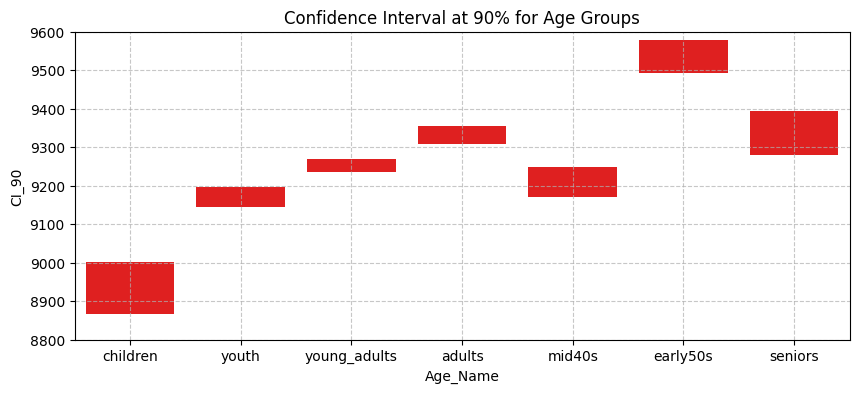

In [ ]:
plt.figure(figsize= (10,4))
sns.barplot(data=df_age, x= "Age_Name", y= "Lower_90", color = "white")
sns.barplot(data=df_age, x= "Age_Name", y= "CI_90", color = "red", bottom=df_age["Lower_90"], label="CI_at_90%")
plt.ylim(8800, 9600)
plt.title("Confidence Interval at 90% for Age Groups")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Answer**

- The confidence intervals at 90%, 95%, and 99% are shown in the table above.

- The CI is not overlapping at 90% for - <br>
  - Children with all other categories
  - Youth with all other categories except mid40s
  - Young adults with all other categories except mid40s
  - Adults with all other categories except Seniors
  - Mid40s with all other categories except youth and young_adults
  - Early50s with all others
  - Seniors with all other categories except adults
- The non overlapping age-groups suggests that spending average for age groups are different

- The CI is overlapping for-<br>
  - youth & mid40s
  - young_adults & mid40s
  - seniors & adults
- The overlapping age-groups suggests that spending average for age groups are same.

**Conclusion:**
- With 99% CI, Children's (with age "0-17") purchase amount is lower than all other age category's purchase amount.
- With 99% CI, Early 50s (with age "51-55") purchase amount is higher than all other age category's purchase amount.
- With 90% CI, there is no sig. difference between the mean purchasing amounts for youth ("18-25") and mid40s ("46-50"), for young_adults ("26-35")  & mid40s ("46-50"), and for Seniors ("55+") & Adults ("36-45")

# Business Insights

<font color = "olive">

**General Insights**

1. There are 5,891 different users and 3,631 unique products in the dataset
2. 75% of the transactions are done by Males
3. 40% of the transactions are carried by people from 26-35 age group
4. Most number of buyers are from city B
5. 35% of the transactions are done by people who stayed in the city for less than one years
6. 59% of the transactions are carried out by unmarried people
7. Product 5, 1, and 8 contributes to 74% of the purchases
8. Males and Females Purchase distributions are non-gausian and following fairly the same path
9. Total of 20 product categories are there
10. More users belong to B City_Category
11. Males have slightly higher purchases than females
12. Except age group 51-55, others age groups have almost same purchases
13. City C has higher purchases than other two cities
14. Marrital status and years of stay in the city have similar distribution
15. For males, age group 51-55 has higher purchases than other groups.
16. Similarly for females, age group 55+ has higher purchases than other groups
17. For both the genders, purchase median is almost the same for unmarried and married person

**Purchases and Gender**

1. The confidence interval of male purchases **`|9409.5-9466.6|`** and female purchases **`|8687.1-8782.1|`** are significantly apart and are not overlapping
2. With 99% confidence we can say, the mean purchase amount for male is higher than females.

**Purchases and Marital Status**

1. The confidence interval of married people purchases **`|9244.0-9278.8|`** and unmarried people purchases **`|9251.7 - 9280.6|`** are overlapping, even for 90% CI.
2. There is no difference in the Buying pattern of Married and Unmarried People

**Purchases and Age Group**

1. With 99% CI, Children's (with age "0-17") purchase amount is lower than all other age category's purchase amount.
2. With 99% CI, Early 50s (with age "51-55") purchase amount is higher than all other age category's purchase amount.
3. With 90% CI, there is no sig. difference between the mean purchasing amounts for youth ("18-25") and mid40s ("46-50"), for young_adults ("26-35")  & mid40s ("46-50"), and for Seniors ("55+") & Adults ("36-45")

# Recommendations

<font color="darkcyan">

1. **One an average Men spent more money than women, Thus company can take steps, like discounts, promotions etc,  to attract male customers** <br><br>
2. **Around 74% of purchaces are from Product_Category 1, 5, 8. Company should look to diversify and understand why other product sales are not contributing much. Also conpany should not loose focus from their cash cow products (1,5,8).** <br><br>
3. **For both males and females, higher age-group (50+ years) is contributing more than others, which is to be understand. Company should look to take steps to increase the revenues from other age groups as well. For example, young-adults and adults contributions should be focused upon** <br><br>
4. **Male customers living in City_Category C spend more money than other male customers living in B or C, Selling more products in the City_Category C will help the company increase the revenue.**

<font size = 5 color = "blue">
__________________________________________**END**___________________________________________